# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} R^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D/2)*(R**D)/sp.gamma(1+D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [3]:
print(getSphereVolumeExact(1)-2)
print(getSphereVolumeExact(2)-np.pi)
print(getSphereVolumeExact(3)-4/3*np.pi)

0.0
0.0
8.881784197001252e-16


<IPython.core.display.Javascript object>


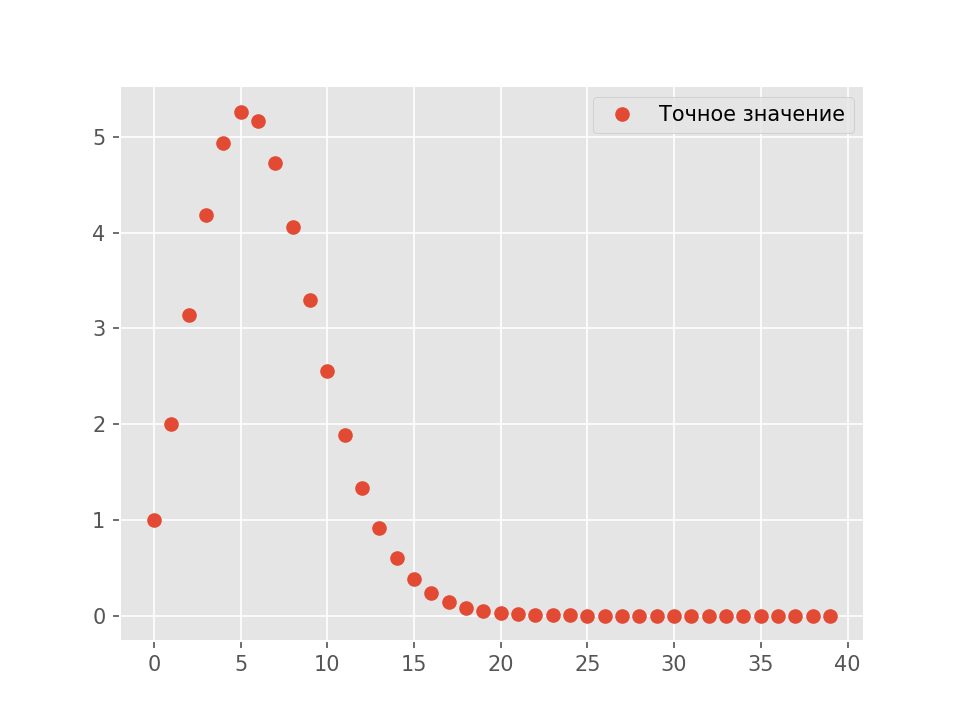

In [4]:
D = np.arange(40)
plt.plot(D, getSphereVolumeExact(D), 'o', label="Точное значение") 
plt.legend()

### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [5]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    dots = np.random.random_sample((D, N))
    norm = np.zeros(N)
    for i in range(D):
        norm += dots[i, :]**2
    inside = norm <= 1.
    V = (2*R)**D*np.sum(inside)/N
    return V

Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-8}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

In [23]:
def eps(ex,rand):
    return abs((ex-rand)/ex)

def plot_by_eps(d, Quasi=False):
    n = np.zeros(d)
    num = np.arange(d)+1

    for D in range(1, d+1):
        N=1
        V_exact = getSphereVolumeExact(D)
        if Quasi == False:
            for i in range(32):
                N *= 2
                V_random = getSphereVolumePseudorandom(N, D)
                if eps(V_exact, V_random) < 1e-3:
                    break
            print("D =", D, "eps =", eps(V_exact, V_random))
        else:
            for i in range(32):
                N*= 2
                V_Quasi = getSphereVolumeQuasirandom(N, D)
                if eps(V_exact, V_Quasi) < 1e-3:
                    break
            print("D =", D, "eps =", eps(V_exact, V_Quasi))
        n[D-1] = N
    plt.plot(num, n)
    plt.yscale("log")
    plt.xlabel("D")
    plt.ylabel("N")
    return

D = 1 eps = 0.0
D = 2 eps = 0.0003080137040323832
D = 3 eps = 0.000868999907862905
D = 4 eps = 4.6990342318766394e-05
D = 5 eps = 0.0007875428167553526
D = 6 eps = 4.4954375341100394e-05
D = 7 eps = 0.0006838128831696859
D = 8 eps = 8.931824442736324e-05
D = 9 eps = 0.0005878651770036029


<IPython.core.display.Javascript object>


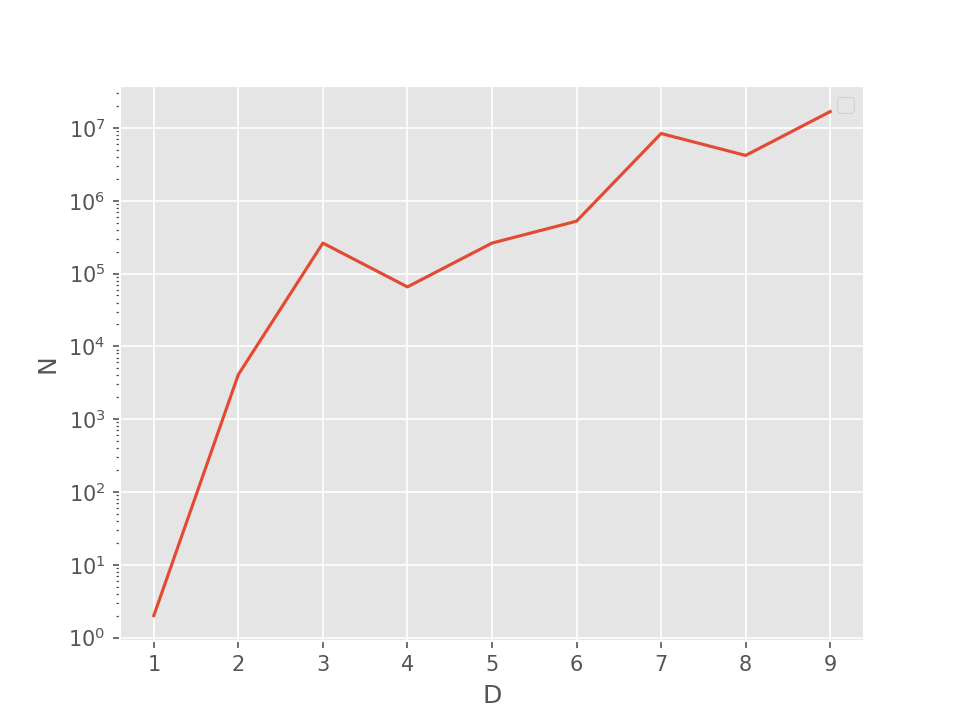

No handles with labels found to put in legend.


In [12]:
plot_by_eps(9)

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [13]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [3]:
sobol_seq.i4_sobol_generate?

In [16]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    dots =  sobol_seq.i4_sobol_generate(D, N)
    norm = np.zeros(N)
    for i in range(D):
        norm += dots[:, i]**2
    inside = norm <= 1.
    V = (2*R)**D*np.sum(inside)/N
    return V

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

D = 1 eps = 0.0
D = 2 eps = 0.0003080137040323832
D = 3 eps = 0.00030801370403252455
D = 4 eps = 0.0005466884680855566
D = 5 eps = 0.00039330298172123186
D = 6 eps = 0.0004274802110827203
D = 7 eps = 0.0008452895484512652
D = 8 eps = 0.00018136683455357143
D = 9 eps = 0.0007914076680341886


<IPython.core.display.Javascript object>


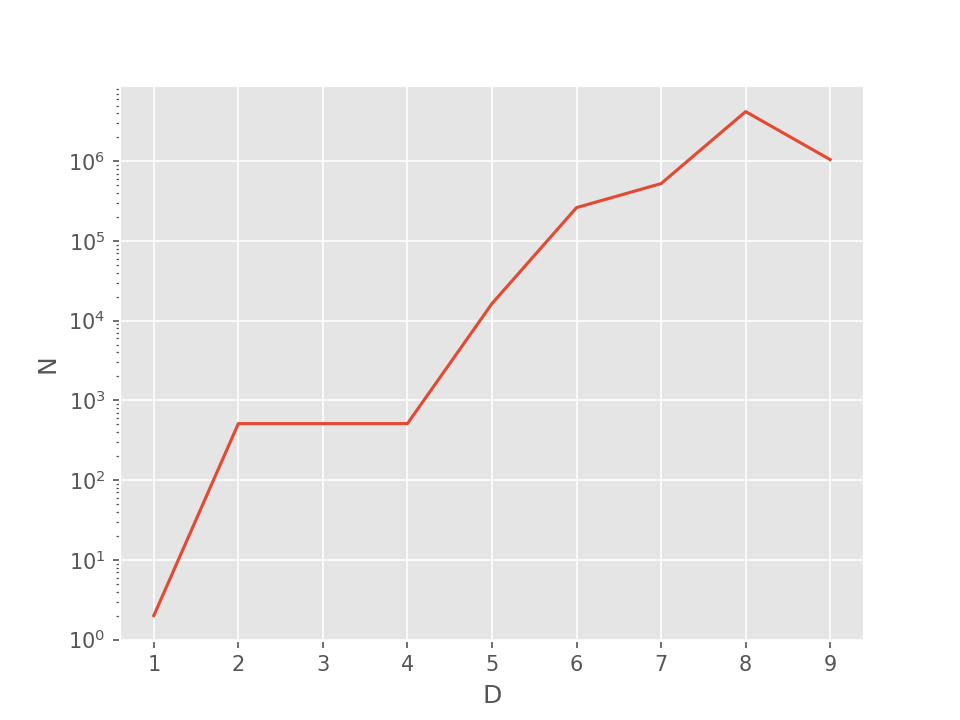

In [24]:
plot_by_eps(9, Quasi = True)

Сделайте выводы об эффективности квазислучайных последовательностей. 

Площадь под графиком квазислучайных последовательностей на прядок меньше площади под рандомным

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненлевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблемотичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [27]:
import numpy as np

def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.randint(0, 2, size=(N,N))
    state[state==0]=-1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [60]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
    horizontal = np.hstack((state,state,state))
    big_state = np.vstack((horizontal, horizontal, horizontal))
    i+=N
    j+=N
    E = -big_state[i,j]*np.sum(big_state[i+1,j]+big_state[i-1,j]+big_state[i,j+1]+big_state[i,j-1])
    return -2*E

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [86]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    dE = np.zeros(N**2)
    i, j = np.random.randint(0, N-1, size=(2, N**2))
    for k in range(N**2):
        dE[k] = getDeltaE(i[k], j[k], state)
        if dE[k] < 0:
            state[i[k], j[k]] = -state[i[k], j[k]]
        else:  
            if (np.random.random() < np.exp(-dE[k]/T)):
                state[i[k], j[k]] = -state[i[k], j[k]]
    return state

Если функция не будет менять состояния изначальной матрицы, то не будет смысла итерировать в главном цикле

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [73]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E=0
    N = state.shape[0]
    horizontal = np.hstack((state,state,state))
    big_state = np.vstack((horizontal, horizontal, horizontal))
    for i in range(N, 2*N-1):
        for j in range(N, 2*N-1):
            E += -big_state[i,j]*np.sum(big_state[i+1,j]+big_state[i-1,j]+big_state[i,j+1]+big_state[i,j-1])
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [88]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

Далее задаются начальные параметры: 
**Nt** - количество точек по температуре, 
**N** - линейный размер решетки, 
**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,
**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [95]:
N       = 10         # размер решетки NxN
Nt      = 150         # количество точек температуры
eqSteps = 500       # количество раз выполнения makeFlip для установления равновесия
steps   = 100         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

<IPython.core.display.Javascript object>


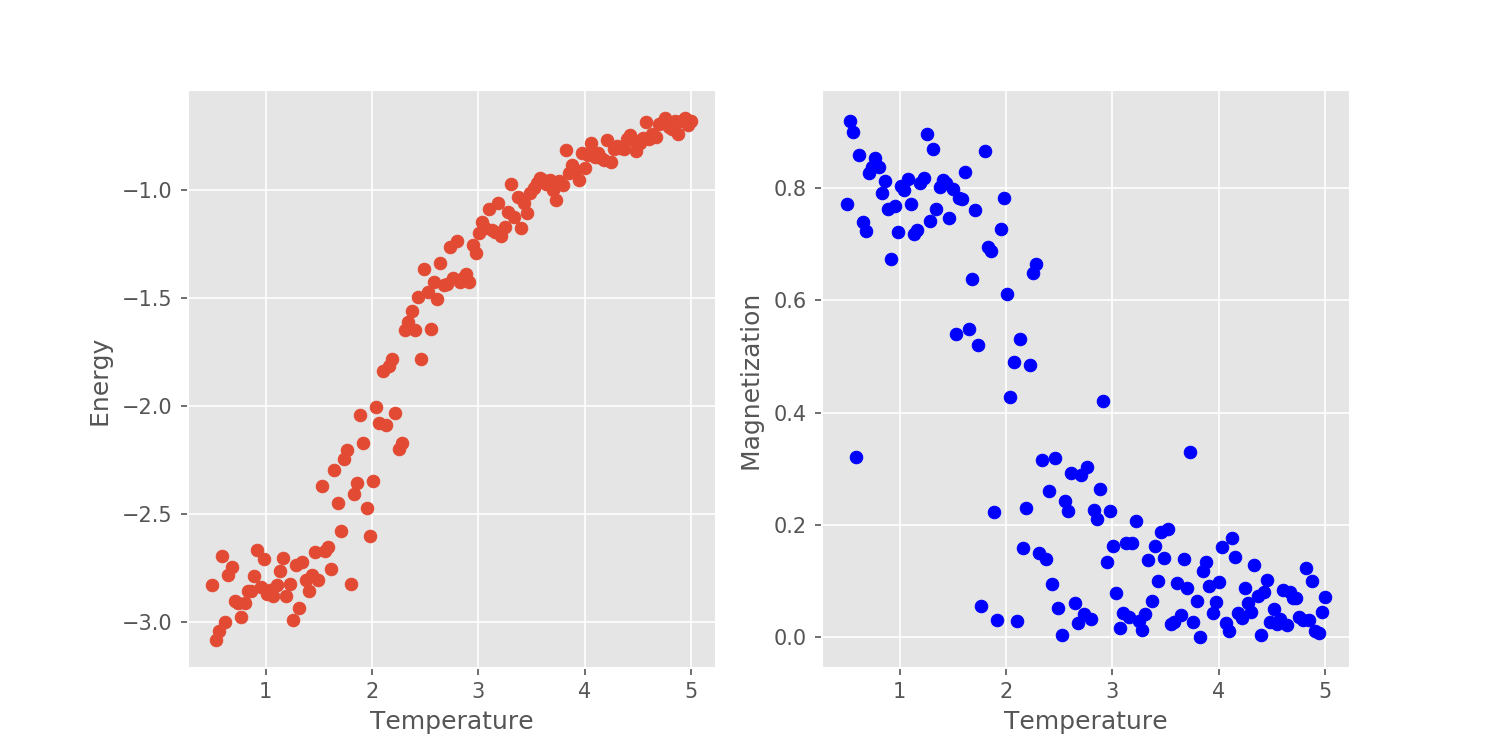

In [96]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описыввают ли они поведение феромагнетиков и фазовые переходы?

На удивление, графики напоминают достаточно точные реальные измерения, т.к. они с некоторым шумом отчетливо совпадают с теоритическими

Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

In [ ]:
N = 64
state = getInitialState(N)

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state);

In [ ]:
# Write your answer here